In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import scipy.stats as stats
    

In [52]:
df=pd.read_csv('insurance.csv', delimiter=',')

In [53]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [54]:
df.shape

(1338, 7)

In [55]:
#From the above commands output its clear that the shape of the data is it has a total of 1338 no of rows and 7 coloums.

In [56]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [57]:
#from df.datatypes we can see that the data type of Age and children is int64 as they have integer values,
# the Attributes BMI and Charges have Float64 data type as these attributes contain decimal vales,
# the Attributes Sex,Smoker and Religion have Object data type as they have non numerical values.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
# from the above command it is clear that the all the 7 coloumns and 1338 rows dont have any null values all have non null 
# values.

In [60]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [61]:
# No null values in the dataset

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [63]:
# Data looks legit as all the statistics seem reasonable
# Looking at the age column, data looks representative of the true age distribution of the adult population
# Very few people have more than 2 children. 75% of the people have 2 or less children
# The claimed amount is higly skewed as most people would require basic medi-care and only few suffer 
# from diseases which cost more to get rid of

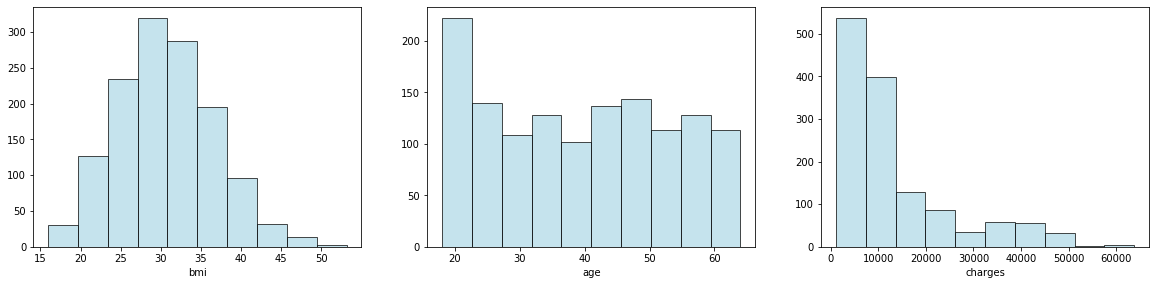

In [64]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()


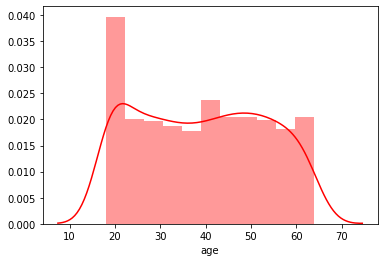

In [65]:
# Distribution of age
sns.distplot(df ['age'], hist=True, kde=True, color = 'red')
plt.show()

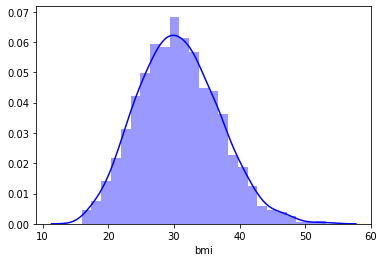

In [66]:
# Distribution of bmi
sns.distplot(df ['bmi'], hist=True, kde=True, color = 'blue')
plt.show()

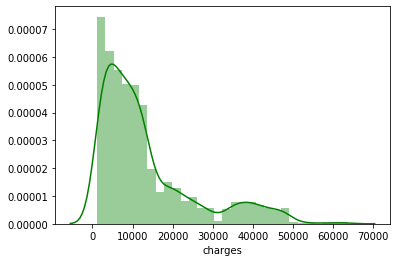

In [67]:
# Distribution of Charges
sns.distplot(df ['charges'], hist=True, kde=True, color = 'green')
plt.show()

In [68]:
# bmi looks quiet normally distributed
# Age seems be be distributed quiet uniformly
# As seen in the previous step, charges are highly skewed

In [69]:
df.skew(axis=0, skipna=True)
# Here we have used skipna to skip the null values but as our dataframe dosent have any null values as seen above we can also 
# skip this command 
# Skew of bmi is very less as seen in the previous step
# age is uniformly distributed and there's hardly any skew
# charges are highly skewed


age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

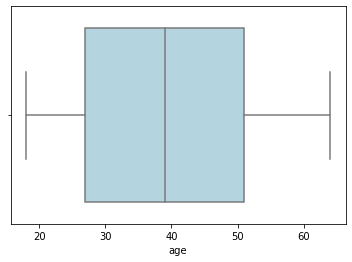

In [70]:
#checking for outliers using visualization tool BOXPLOT
sns.boxplot(df['age'], color='lightblue')
plt.show()
# we have no outliers in age and also we can see from the skweness results the skweness for age is very low i.e. 0.055

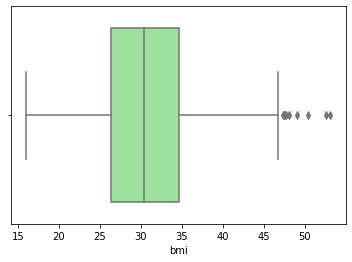

In [71]:
#checking for outliers using visualization tool BOXPLOT
sns.boxplot(df['bmi'], color='lightgreen')
plt.show()
# we have few outliers in bmi after 47 and also we can see from the skweness results the skweness for bmi is 0.28 i.e. it can
# have some outliers

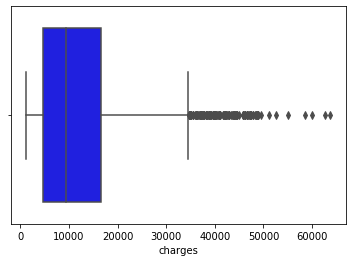

In [72]:
#checking for outliers using visualization tool box plot
sns.boxplot(df['charges'], color='blue')
plt.show()
# we have many outliers in charges and also we can see from the skweness results the skweness for charges is 1.51 ie it has a
# huge no of outliers.

In [73]:
# Summary
# bmi has a few extreme values
# charges as it is highly skewed, there are quiet a lot of extreme values

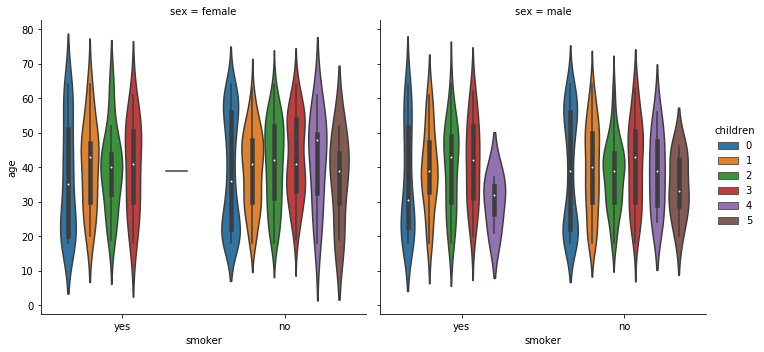

In [74]:
# categorical polting
sns.catplot(x="smoker", 
            y="age", 
            hue="children", 
            col="sex", 
            data=df, 
            kind="violin")
plt.show()

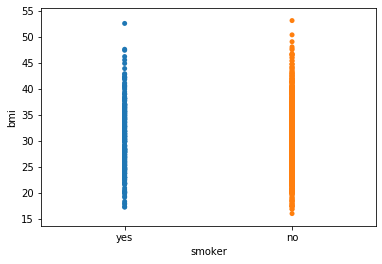

In [75]:
sns.stripplot(df['smoker'], df['bmi'], jitter=False)
plt.show()

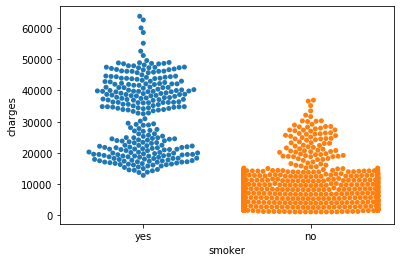

In [76]:
sns.swarmplot(df['smoker'], df['charges'])
plt.show()

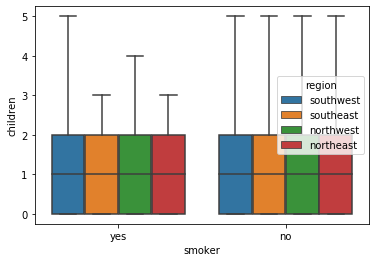

In [77]:
sns.boxplot(df['smoker'], df['children'], hue=df['region'])
plt.show()

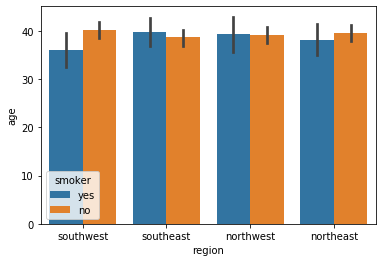

In [78]:
sns.barplot(df['region'], df['age'], hue=df['smoker'])
plt.show()

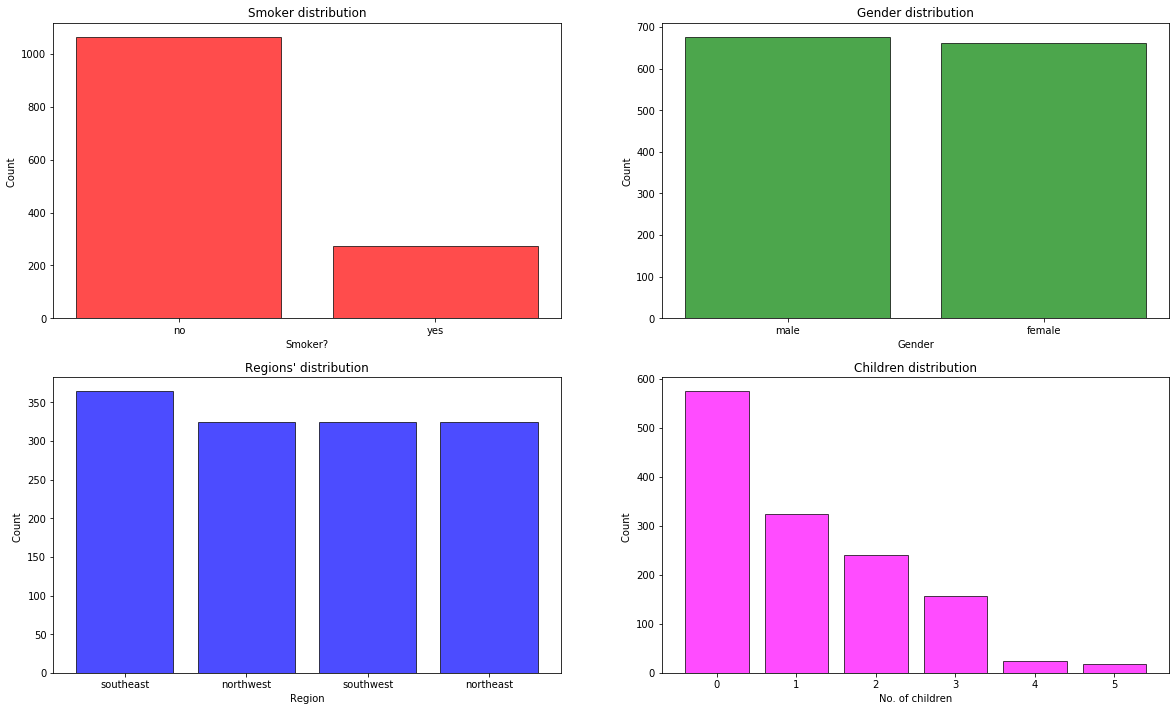

In [79]:
plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'magenta',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

In [80]:
# There are a lot more non-smokers than there are smokers in the data
# Instances are distributed evenly accross all regions
# Gender is also distributed evenly
# Most instances have less than 2 children and very few have 4 or 5 children Bi-variate distribution of every possible 
# attribute pair

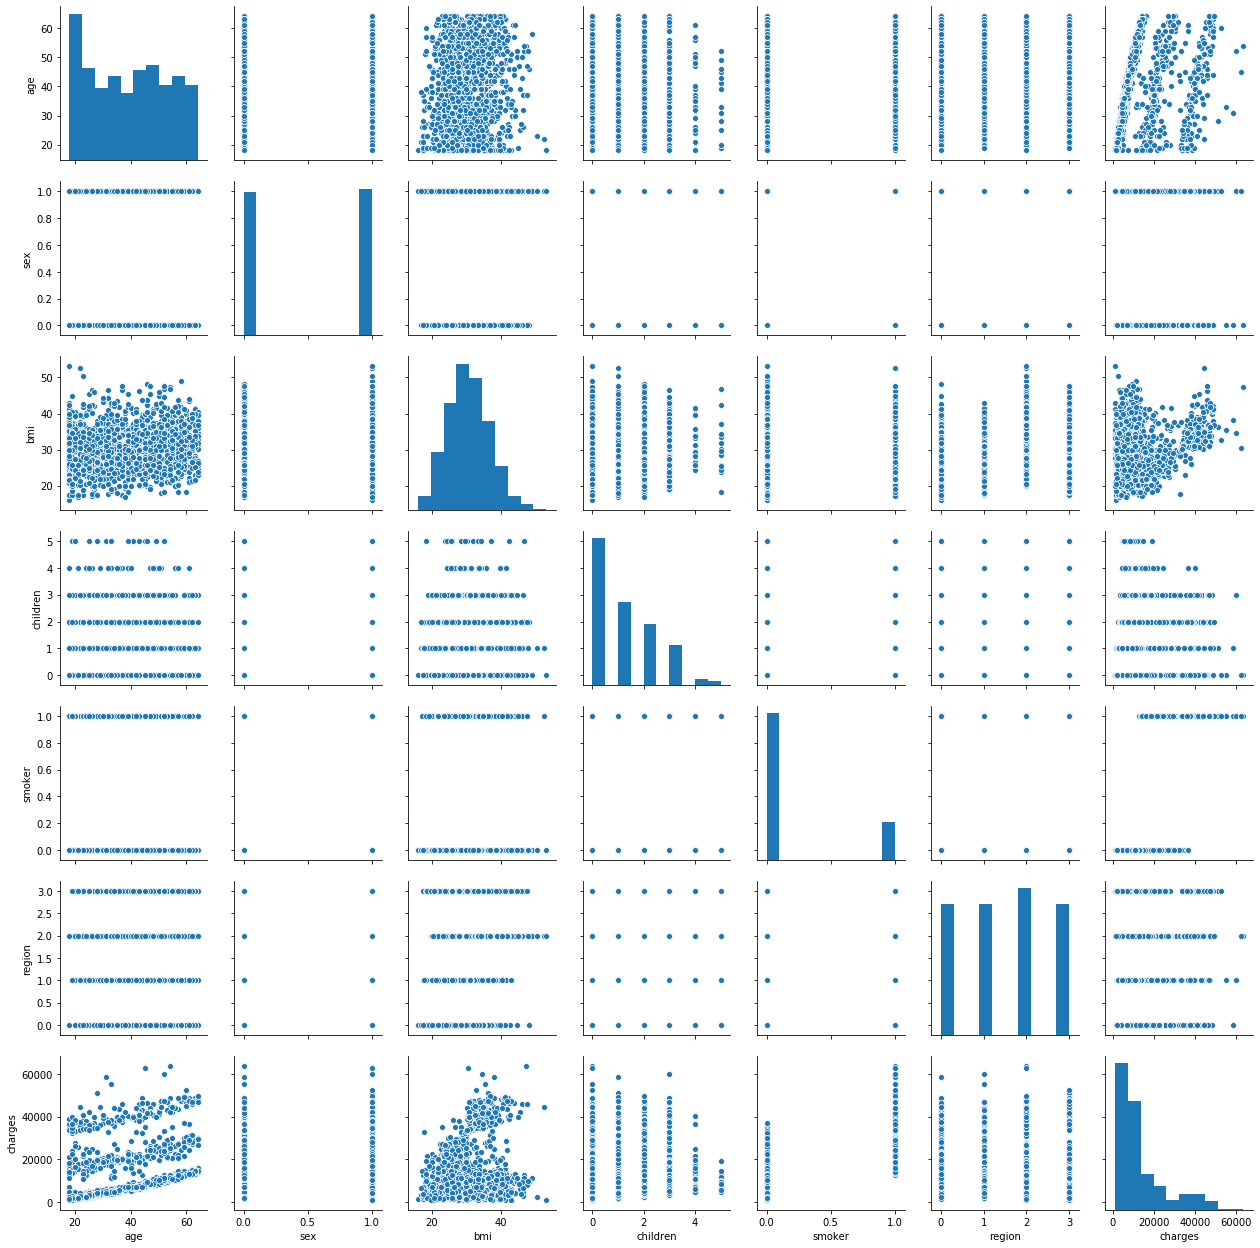

In [81]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

In [82]:
# The only obvious correlation of 'charges' is with 'smoker'
# Looks like smokers claimed more money than non-smokers
# There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, 
# older people are charged more than the younger ones

In [83]:
# Do charges of people who smoke differ significantly from the people who don't?
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

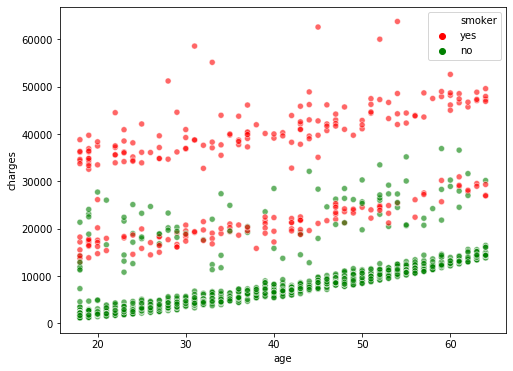

In [84]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

In [85]:
# Visually the difference between charges of smokers and charges of non-smokers is apparent

In [86]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')


Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


In [87]:
# Smokers seem to claim significantly more money than non-smokers

In [88]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

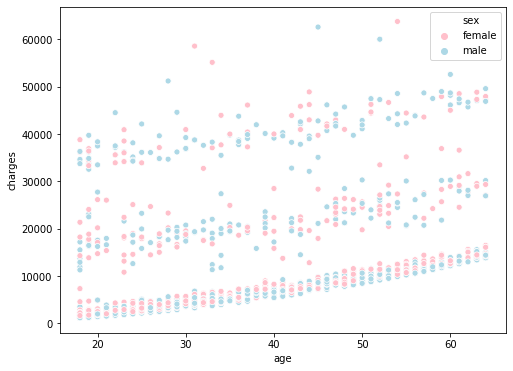

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['pink','lightblue'] )
plt.show()

In [90]:
# Visually, there is no apparent relation between gender and charges

In [91]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [92]:
# bmi of both the genders are identical

In [93]:
# Is the proportion of smokers significantly different in different genders?
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [94]:
# Proportion of smokers in males is significantly different from that of the females
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['smoker'], df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [95]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


No. of children has no effect on bmi as the p_value (0.716) > 0.05
